In [289]:
import os
import pandas as pd
import numpy as np
%pylab inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


### 3) Think about possible measurement errors

In [219]:
#complaints = pd.read_csv("https://data.cityofnewyork.us/resource/erm2-nwe9.csv")
complaints = pd.read_csv('http://cosmo.nyu.edu/~fb55/PUI2016/data/311_Service_Requests_from_2010_to_Present.csv')

In [220]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,34212771,09/01/2016 12:00:06 AM,09/01/2016 06:02:10 AM,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,11413.0,137-47 CARSON STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.675208,-73.754949,"(40.67520813178531, -73.75494944502233)"
1,34212392,09/01/2016 12:00:35 AM,09/02/2016 04:53:48 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10469.0,943 EAST 217 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.879986,-73.856707,"(40.87998640855491, -73.85670741555177)"
2,34214520,09/01/2016 12:00:37 AM,09/01/2016 01:05:43 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11369.0,98-02 25 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.764632,-73.871623,"(40.76463242381882, -73.87162284918391)"
3,34212483,09/01/2016 12:00:54 AM,09/01/2016 03:15:32 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,1017 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.885559,-73.850782,"(40.885558858976104, -73.85078238918491)"
4,34214231,09/01/2016 12:01:15 AM,09/06/2016 09:27:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,10040.0,4700 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.864140,-73.929501,"(40.864140093130686, -73.92950060219349)"


In [221]:
complaints.columns

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',

In [222]:
# Check if all Boroughs and Community Districts are represented in the Data 
uniquecd = complaints['Community Board'].drop_duplicates().as_matrix()
uniquecd

array(['13 QUEENS', '12 BRONX', '03 QUEENS', '12 MANHATTAN',
       '09 MANHATTAN', '08 QUEENS', '01 QUEENS', '07 BRONX', '01 BROOKLYN',
       '03 MANHATTAN', '09 QUEENS', '05 BRONX', '03 BROOKLYN',
       '07 MANHATTAN', '12 BROOKLYN', '0 Unspecified', '09 BROOKLYN',
       '07 QUEENS', '15 BROOKLYN', '08 MANHATTAN', '10 BROOKLYN',
       '08 BROOKLYN', '04 MANHATTAN', '02 MANHATTAN', '12 QUEENS',
       '04 BRONX', '04 BROOKLYN', '01 BRONX', 'Unspecified MANHATTAN',
       '10 QUEENS', '18 BROOKLYN', '11 BROOKLYN', '10 MANHATTAN',
       '11 QUEENS', '16 BROOKLYN', '05 BROOKLYN', '05 MANHATTAN',
       '55 BROOKLYN', '08 BRONX', '09 BRONX', '17 BROOKLYN',
       '01 MANHATTAN', '05 QUEENS', '06 QUEENS', '02 BRONX', '11 BRONX',
       '04 QUEENS', 'Unspecified BROOKLYN', '02 QUEENS',
       '01 STATEN ISLAND', '03 STATEN ISLAND', '14 BROOKLYN',
       '07 BROOKLYN', '02 STATEN ISLAND', '10 BRONX', '11 MANHATTAN',
       '06 BROOKLYN', '13 BROOKLYN', '06 MANHATTAN', 'Unspecified BRONX

In [223]:
print(len(uniquecd))

74


#### How many unique values do we have? 
There are 74 unique community districts in the data.

#### Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. (We should have 59 Community Districts.)
There are more than 59 unique values because some are 'unspecified'. All boroughs are represented, however Staten Island only has one Community District included in the data.

#### Check for duplicates? Are these plausible?
There are no duplicate rows in this dataset. 

In [224]:
print(len(complaints.drop_duplicates()))

34897


#### What about missing values? Can you detect any patterns? 
There are cells with missing values. Columns 'Landmark', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Garage Lot Name', 'Ferry Direction', and 'Ferry Terminal Name' contain exclusively null values. Similarly, 'Bridge Highway Name', 'Bridge Highway Direction', and 'Road Ramp' only contain one non-null value. Community Board does not have any null values.

In [225]:
complaints.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                       12779
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         1171
Location Type                      6801
Incident Zip                       1852
Incident Address                   7174
Street Name                        7175
Cross Street 1                    14533
Cross Street 2                    14638
Intersection Street 1             29857
Intersection Street 2             29885
Address Type                       1556
City                               1845
Landmark                          34881
Facility Type                     19136
Status                                0
Due Date                          13719
Resolution Description             1807
Resolution Action Updated Date     5745
Community Board                       0
Borough                               0


In [226]:
# Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type 
# to fill missings in Resolution Descriptor?

In [227]:
complaints = complaints.rename(columns={'Complaint Type': 'Complaint_Type', 'Resolution Description': 'Resolution_Description'})

In [228]:
complaints.Resolution_Description.fillna(complaints.Complaint_Type, inplace=True)

In [229]:
complaints.Resolution_Description.isnull().sum()

0

#### Generate marker for unplausible Community Districts, how do these districts look like? Drop the marked districts

The unplausible Community Districts are those which include the word 'unspecified' in the title. I dropped these rows using the series.str.contains() method in Pandas. I also dropped the Community Districts with numbers greater than 18 because << need pluto data description >> 

In [230]:
complaints = complaints.rename(columns={'Community Board': 'Community_Board'})

In [231]:
complaints = complaints[complaints["Community_Board"].str.contains('Unspecified') != True]

In [232]:
print(len(complaints))

32899


In [233]:
complaints['Community_Board'].drop_duplicates().as_matrix()

array(['13 QUEENS', '12 BRONX', '03 QUEENS', '12 MANHATTAN',
       '09 MANHATTAN', '08 QUEENS', '01 QUEENS', '07 BRONX', '01 BROOKLYN',
       '03 MANHATTAN', '09 QUEENS', '05 BRONX', '03 BROOKLYN',
       '07 MANHATTAN', '12 BROOKLYN', '09 BROOKLYN', '07 QUEENS',
       '15 BROOKLYN', '08 MANHATTAN', '10 BROOKLYN', '08 BROOKLYN',
       '04 MANHATTAN', '02 MANHATTAN', '12 QUEENS', '04 BRONX',
       '04 BROOKLYN', '01 BRONX', '10 QUEENS', '18 BROOKLYN',
       '11 BROOKLYN', '10 MANHATTAN', '11 QUEENS', '16 BROOKLYN',
       '05 BROOKLYN', '05 MANHATTAN', '55 BROOKLYN', '08 BRONX',
       '09 BRONX', '17 BROOKLYN', '01 MANHATTAN', '05 QUEENS', '06 QUEENS',
       '02 BRONX', '11 BRONX', '04 QUEENS', '02 QUEENS',
       '01 STATEN ISLAND', '03 STATEN ISLAND', '14 BROOKLYN',
       '07 BROOKLYN', '02 STATEN ISLAND', '10 BRONX', '11 MANHATTAN',
       '06 BROOKLYN', '13 BROOKLYN', '06 MANHATTAN', '02 BROOKLYN',
       '06 BRONX', '14 QUEENS', '03 BRONX', '83 QUEENS', '80 QUEENS',
      

In [234]:
complaints = complaints[complaints["Community_Board"].str.contains('55') != True]
complaints = complaints[complaints["Community_Board"].str.contains('83') != True]
complaints = complaints[complaints["Community_Board"].str.contains('80') != True]
complaints = complaints[complaints["Community_Board"].str.contains('82') != True]
complaints = complaints[complaints["Community_Board"].str.contains('81') != True]
complaints = complaints[complaints["Community_Board"].str.contains('95') != True]
complaints = complaints[complaints["Community_Board"].str.contains('64') != True]
complaints = complaints[complaints["Community_Board"].str.contains('26') != True]
complaints = complaints[complaints["Community_Board"].str.contains('27') != True]

In [235]:
complaints['Community_Board'].drop_duplicates().as_matrix()

array(['13 QUEENS', '12 BRONX', '03 QUEENS', '12 MANHATTAN',
       '09 MANHATTAN', '08 QUEENS', '01 QUEENS', '07 BRONX', '01 BROOKLYN',
       '03 MANHATTAN', '09 QUEENS', '05 BRONX', '03 BROOKLYN',
       '07 MANHATTAN', '12 BROOKLYN', '09 BROOKLYN', '07 QUEENS',
       '15 BROOKLYN', '08 MANHATTAN', '10 BROOKLYN', '08 BROOKLYN',
       '04 MANHATTAN', '02 MANHATTAN', '12 QUEENS', '04 BRONX',
       '04 BROOKLYN', '01 BRONX', '10 QUEENS', '18 BROOKLYN',
       '11 BROOKLYN', '10 MANHATTAN', '11 QUEENS', '16 BROOKLYN',
       '05 BROOKLYN', '05 MANHATTAN', '08 BRONX', '09 BRONX',
       '17 BROOKLYN', '01 MANHATTAN', '05 QUEENS', '06 QUEENS', '02 BRONX',
       '11 BRONX', '04 QUEENS', '02 QUEENS', '01 STATEN ISLAND',
       '03 STATEN ISLAND', '14 BROOKLYN', '07 BROOKLYN',
       '02 STATEN ISLAND', '10 BRONX', '11 MANHATTAN', '06 BROOKLYN',
       '13 BROOKLYN', '06 MANHATTAN', '02 BROOKLYN', '06 BRONX',
       '14 QUEENS', '03 BRONX'], dtype=object)

In [236]:
complaints['Community_Board'].drop_duplicates().as_matrix()

array(['13 QUEENS', '12 BRONX', '03 QUEENS', '12 MANHATTAN',
       '09 MANHATTAN', '08 QUEENS', '01 QUEENS', '07 BRONX', '01 BROOKLYN',
       '03 MANHATTAN', '09 QUEENS', '05 BRONX', '03 BROOKLYN',
       '07 MANHATTAN', '12 BROOKLYN', '09 BROOKLYN', '07 QUEENS',
       '15 BROOKLYN', '08 MANHATTAN', '10 BROOKLYN', '08 BROOKLYN',
       '04 MANHATTAN', '02 MANHATTAN', '12 QUEENS', '04 BRONX',
       '04 BROOKLYN', '01 BRONX', '10 QUEENS', '18 BROOKLYN',
       '11 BROOKLYN', '10 MANHATTAN', '11 QUEENS', '16 BROOKLYN',
       '05 BROOKLYN', '05 MANHATTAN', '08 BRONX', '09 BRONX',
       '17 BROOKLYN', '01 MANHATTAN', '05 QUEENS', '06 QUEENS', '02 BRONX',
       '11 BRONX', '04 QUEENS', '02 QUEENS', '01 STATEN ISLAND',
       '03 STATEN ISLAND', '14 BROOKLYN', '07 BROOKLYN',
       '02 STATEN ISLAND', '10 BRONX', '11 MANHATTAN', '06 BROOKLYN',
       '13 BROOKLYN', '06 MANHATTAN', '02 BROOKLYN', '06 BRONX',
       '14 QUEENS', '03 BRONX'], dtype=object)

In [237]:
print(len(complaints['Community_Board'].drop_duplicates().as_matrix()))

59


In [238]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level

In [239]:
cbc = pd.DataFrame(complaints['Unique Key'].groupby(complaints['Community_Board']).count()).reset_index()

In [240]:
cbc = cbc.rename(columns={'Community_Board': 'Community Board Name', 'Unique Key': 'Count of Complaints'})

In [241]:
cbc = cbc.sort_values(by='Count of Complaints', ascending=0)

#### Reduced dataset
Below is a dataframe, which quantifies the number of complaints by Community District. I sorted the Community Districts in descending order by number of complaints.

In [242]:
cbc.head()

,Community Board Name,Count of Complaints
49,12 MANHATTAN,1162
50,12 QUEENS,968
57,17 BROOKLYN,883
20,05 BROOKLYN,871
11,03 BROOKLYN,865


### 4) Think about the demographics of the Community Districts

In [243]:
final_demo = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv")

In [244]:
final_demo.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [245]:
# Check variables in file

In [246]:
final_demo.columns

Index([u'FIPS', u'cd_id', u'Total Population',
       u'Population Density (per sq. mile)', u'% Total Population: Male',
       u'% Total Population: 18 to 24 Years',
       u'% Total Population: 25 to 34 Years',
       u'% Total Population: 35 to 44 Years',
       u'% Population 5 Years And Over: Speak Only English',
       u'% Population 5 Years And Over: Spanish or Spanish Creole',
       ...
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations',
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations',
       u'% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations',
       u'% Employed Civilian Population 16 Years And Over: Service occupations',
       u'% Employed Civilian Population 16 Years And Over: Sales and office occupations',
       

#### How many community districts are in file? 
There are 59 Community Districts in the file. 

In [247]:
cd_id = final_demo['cd_id'].drop_duplicates().as_matrix()

In [248]:
cd_id

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11111',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [249]:
final_demo = final_demo.replace(['MN11111'], ['MN11'])

In [250]:
print(len(cd_id))

59


In [251]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311
# Save data frame

In [252]:
final_demo = final_demo.iloc[:,[1, 139]]
final_demo = final_demo.rename(columns={'Median household income (In 2014 Inflation Adjusted Dollars)': 'Median Household Income', 'cd_id': 'Community Board Name'})
final_demo.head()

,Community Board Name,Median Household Income
0,BX08,54224
1,BX12,44906
2,BX10,54962
3,BX11,47910
4,BX03,22041


In [253]:
internet = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [254]:
print(len(internet))

59


In [255]:
internet.isnull().sum()

FIPS                                                       0
Geographic Identifier                                      0
Qualifying Name                                            0
Households                                                 0
Households: With An Internet Subscription                  0
Households: Dial-Up Alone                                  0
Households: Dsl                                            0
Households: With Mobile Broadband                          0
Households: Without Mobile Broadband                       0
Households: Cable Modem                                    0
Households: With Mobile Broadband.1                        0
Households: Without Mobile Broadband.1                     0
Households: Fiber-Optic                                    0
Households: With Mobile Broadband.2                        0
Households: Without Mobile Broadband.2                     0
Households: Satellite Internet Service                     0
Households: With Mobile 

In [256]:
# Check variables in file
internet.columns

Index([u'FIPS', u'Geographic Identifier', u'Qualifying Name', u'Households',
       u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband',
       u'Households: Without Mobile Broadband', u'Households: Cable Modem',
       u'Households: With Mobile Broadband.1',
       u'Households: Without Mobile Broadband.1', u'Households: Fiber-Optic',
       u'Households: With Mobile Broadband.2',
       u'Households: Without Mobile Broadband.2',
       u'Households: Satellite Internet Service',
       u'Households: With Mobile Broadband.3',
       u'Households: Without Mobile Broadband.3',
       u'Households: Two or More Fixed Broadband Types, or Other',
       u'Households: With Mobile Broadband.4',
       u'Households: Without Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup',
       u'Households: Internet Access Without A Subscription',
       u'Households: No Internet Acc

* According to the Bronx Community District websites, Hunts Point is in Bronx CD2 so I am considering 'NYC-Bronx Community District 1 & 2--Hunts Point, New York' as BX02 upon merge. http://bronxmall.com/commboards/cd2.html
* According to the Bronx CD website, Belmont is in CD6 so I am considering 'NYC-Bronx Community District 3 & 6--Belmont, New York' as BX06 upon merge. http://bronxmall.com/commboards/cd6.html
* According to the Manhattan CD website, Chelsea is located in CD4 so I will consider 'NYC-Manhattan Community District 4 & 5--Chelsea, New York' as MN04 upon merge. http://www.nyc.gov/html/cau/html/cb/manhattan.shtml
* According to the Manhattan CD website, Battery Park is a part of CD1 so I will consider 'NYC-Manhattan Community District 1 & 2--Battery Park City, New York' as MN01. http://www.nyc.gov/html/cau/html/cb/manhattan.shtml

In [257]:
internet = internet.replace(['NYC-Bronx Community District 8--Riverdale, New York',
       'NYC-Bronx Community District 12--Wakefield, New York',
       'NYC-Bronx Community District 10--Co-op City, New York',
       'NYC-Bronx Community District 11--Pelham Parkway, New York',
       'NYC-Bronx Community District 3 & 6--Belmont, New York',
       'NYC-Bronx Community District 7--Bedford Park, New York',
       'NYC-Bronx Community District 5--Morris Heights, New York',
       'NYC-Bronx Community District 4--Concourse, New York',
       'NYC-Bronx Community District 9--Castle Hill, New York',
       'NYC-Bronx Community District 1 & 2--Hunts Point, New York',
       'NYC-Manhattan Community District 12--Washington Heights, New York',
       'NYC-Manhattan Community District 9--Hamilton Heights, New York',
       'NYC-Manhattan Community District 10--Central Harlem PUMA, New York',
       'NYC-Manhattan Community District 11--East Harlem PUMA, New York',
       'NYC-Manhattan Community District 8--Upper East Side PUMA, New York',
       'NYC-Manhattan Community District 7--Upper West Side & West Side PUMA, New York',
       'NYC-Manhattan Community District 4 & 5--Chelsea, New York',
       'NYC-Manhattan Community District 6--Murray Hill, New York',
       'NYC-Manhattan Community District 3--Chinatown & Lower East Side PUMA, New York',
       'NYC-Manhattan Community District 1 & 2--Battery Park City, New York',
       'NYC-Staten Island Community District 3--Tottenville, New York',
       'NYC-Staten Island Community District 2--New Springville & South Beach PUMA, New York',
       'NYC-Staten Island Community District 1--Port Richmond, New York',
       'NYC-Brooklyn Community District 1--Greenpoint & Williamsburg PUMA, New York',
       'NYC-Brooklyn Community District 4--Bushwick PUMA, New York',
       'NYC-Brooklyn Community District 3--Bedford-Stuyvesant PUMA, New York',
       'NYC-Brooklyn Community District 2--Brooklyn Heights & Fort Greene PUMA, New York',
       'NYC-Brooklyn Community District 6--Park Slope, New York',
       'NYC-Brooklyn Community District 8--Crown Heights North & Prospect Heights PUMA, New York',
       'NYC-Brooklyn Community District 16--Brownsville & Ocean Hill PUMA, New York',
       'NYC-Brooklyn Community District 5--East New York & Starrett City PUMA, New York',
       'NYC-Brooklyn Community District 18--Canarsie & Flatlands PUMA, New York',
       'NYC-Brooklyn Community District 17--East Flatbush, New York',
       'NYC-Brooklyn Community District 9--Crown Heights South, New York',
       'NYC-Brooklyn Community District 7--Sunset Park & Windsor Terrace PUMA, New York',
       'NYC-Brooklyn Community District 10--Bay Ridge & Dyker Heights PUMA, New York',
       'NYC-Brooklyn Community District 12--Borough Park, New York',
       'NYC-Brooklyn Community District 14--Flatbush & Midwood PUMA, New York',
       'NYC-Brooklyn Community District 15--Sheepshead Bay, New York',
       'NYC-Brooklyn Community District 11--Bensonhurst & Bath Beach PUMA, New York',
       'NYC-Brooklyn Community District 13--Brighton Beach & Coney Island PUMA, New York',
       'NYC-Queens Community District 1--Astoria & Long Island City PUMA, New York',
       'NYC-Queens Community District 3--Jackson Heights & North Corona PUMA, New York',
       'NYC-Queens Community District 7--Flushing, New York',
       'NYC-Queens Community District 11--Bayside, New York',
       'NYC-Queens Community District 13--Queens Village, New York',
       'NYC-Queens Community District 8--Briarwood, New York',
       'NYC-Queens Community District 4--Elmhurst & South Corona PUMA, New York',
       'NYC-Queens Community District 6--Forest Hills & Rego Park PUMA, New York',
       'NYC-Queens Community District 2--Sunnyside & Woodside PUMA, New York',
       'NYC-Queens Community District 5--Ridgewood, New York',
       'NYC-Queens Community District 9--Richmond Hill & Woodhaven PUMA, New York',
       'NYC-Queens Community District 12--Jamaica, New York',
       'NYC-Queens Community District 10--Howard Beach & Ozone Park PUMA, New York',
       'NYC-Queens Community District 14--Far Rockaway, New York'], ['BX08', 'BX12', 'BX10', 'BX11', 'BX06', 'BX07', 'BX05', 'BX04', 'BX09', 'BX02',
'MN12', 'MN09', 'MN10', 'MN11', 'MN08', 'MN07', 'MN04', 'MN06', 'MN03', 'MN01',
'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06', 'BK08', 'BK16', 'BK05', 'BK18',
'BK17', 'BK09', 'BK07', 'BK10', 'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09', 'QN12', 'QN10', 'QN14'])

In [258]:
internet = internet.rename(columns={'Qualifying Name': 'Community Board Name'})

In [259]:
internet.head()

,FIPS,Geographic Identifier,Community Board Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,BX08,42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,BX12,44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,BX10,47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,BX11,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,BX06,57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [260]:
# How many community districts are in file? 
internet['Community Board Name'].drop_duplicates().as_matrix()
print(len(internet['Community Board Name'].drop_duplicates().as_matrix()))

55


In [261]:
# Manipulate data to get some information on demographics by Community District. 
# Think about who might be more likely to call 311

In [262]:
# Aggregate the mobile subscription data
# http://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk
with_mobile = internet.iloc[:,[2, 7, 10, 13, 16, 19, 21]]

In [263]:
with_mobile.columns

Index([u'Community Board Name', u'Households: With Mobile Broadband',
       u'Households: With Mobile Broadband.1',
       u'Households: With Mobile Broadband.2',
       u'Households: With Mobile Broadband.3',
       u'Households: With Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup'],
      dtype='object')

In [264]:
with_mobile['Households With Mobile Broadband'] = with_mobile.sum(axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [265]:
with_mobile.head()
# Households: With Mobile Broadband = DSL connection
# Households: With Mobile Broadband.1 = cable modem
# Households: With Mobile Broadband.2 = fiber-optic
# Households: With Mobile Broadband.3 = satellite with internet
# Households: With Mobile Broadband.4 = two or more fixed broadband types, or other

,Community Board Name,Households: With Mobile Broadband,Households: With Mobile Broadband.1,Households: With Mobile Broadband.2,Households: With Mobile Broadband.3,Households: With Mobile Broadband.4,Households: Mobile Broadband Alone or With Dialup,Households With Mobile Broadband
0,BX08,946,10433,433,37,3510,2168,17527
1,BX12,405,5577,2358,0,2146,928,11414
2,BX10,398,6377,1200,0,3450,639,12064
3,BX11,474,5624,2272,241,2137,1001,11749
4,BX06,651,6690,695,111,6760,1385,16292


In [266]:
print(len(with_mobile))

59


In [267]:
without_mobile =  internet.iloc[:,[2, 8, 11, 14, 17, 20, 22]]

In [268]:
without_mobile['Households Without Mobile Broadband'] = without_mobile.sum(axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [269]:
without_mobile.head()

,Community Board Name,Households: Without Mobile Broadband,Households: Without Mobile Broadband.1,Households: Without Mobile Broadband.2,Households: Without Mobile Broadband.3,Households: Without Mobile Broadband.4,Households: Internet Access Without A Subscription,Households Without Mobile Broadband
0,BX08,1867,8745,506,38,2668,2119,15943
1,BX12,444,13076,3858,131,3142,1891,22542
2,BX10,1465,13667,2290,0,3085,2882,23389
3,BX11,1004,12293,3163,67,3586,2722,22835
4,BX06,646,9157,815,83,8422,3312,22435


In [270]:
print(len(without_mobile))

59


In [271]:
mobile = pd.concat([with_mobile, without_mobile], axis=1)

In [272]:
mobile = mobile.iloc[:,[0, 7, 15]]

In [273]:
mobile.head()

,Community Board Name,Households With Mobile Broadband,Households Without Mobile Broadband
0,BX08,17527,15943
1,BX12,11414,22542
2,BX10,12064,23389
3,BX11,11749,22835
4,BX06,16292,22435


In [274]:
print(len(mobile))

59


In [275]:
# Aggregate internet type by high and low connections
# high: dsl, cable modem, fiber optic, Two or More Fixed Broadband Types/ or Other
# low: dial up, satellite internet service, mobile broadband

In [276]:
hsconn =  internet.iloc[:,[2, 6, 9, 12]]
hsconn['Households With High Speed Internet'] = hsconn.sum(axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [277]:
hsconn.head()

,Community Board Name,Households: Dsl,Households: Cable Modem,Households: Fiber-Optic,Households With High Speed Internet
0,BX08,2813,19178,939,22930
1,BX12,849,18653,6216,25718
2,BX10,1863,20044,3490,25397
3,BX11,1478,17917,5435,24830
4,BX06,1297,15847,1510,18654


In [278]:
lsconn = internet.iloc[:, [2, 5, 15]]
lsconn['Households With Low Speed Internet'] = lsconn.sum(axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [279]:
lsconn.head()

,Community Board Name,Households: Dial-Up Alone,Households: Satellite Internet Service,Households With Low Speed Internet
0,BX08,444,75,519
1,BX12,178,131,309
2,BX10,158,0,158
3,BX11,141,308,449
4,BX06,88,194,282


In [280]:
intconn = pd.concat([lsconn, hsconn], axis=1)
intconn = intconn.iloc[:,[0,3, 8]]

In [281]:
intconn.head()

,Community Board Name,Households With Low Speed Internet,Households With High Speed Internet
0,BX08,519,22930
1,BX12,309,25718
2,BX10,158,25397
3,BX11,449,24830
4,BX06,282,18654


In [282]:
# Harmonize the dataframes
cbc = cbc.replace(['13 QUEENS', '12 BRONX', '03 QUEENS', '12 MANHATTAN',
       '09 MANHATTAN', '08 QUEENS', '01 QUEENS', '07 BRONX', '01 BROOKLYN',
       '03 MANHATTAN', '09 QUEENS', '05 BRONX', '03 BROOKLYN',
       '07 MANHATTAN', '12 BROOKLYN', '09 BROOKLYN', '07 QUEENS',
       '15 BROOKLYN', '08 MANHATTAN', '10 BROOKLYN', '08 BROOKLYN',
       '04 MANHATTAN', '02 MANHATTAN', '12 QUEENS', '04 BRONX',
       '04 BROOKLYN', '01 BRONX', '10 QUEENS', '18 BROOKLYN',
       '11 BROOKLYN', '10 MANHATTAN', '11 QUEENS', '16 BROOKLYN',
       '05 BROOKLYN', '05 MANHATTAN', '08 BRONX', '09 BRONX',
       '17 BROOKLYN', '01 MANHATTAN', '05 QUEENS', '06 QUEENS', '02 BRONX',
       '11 BRONX', '04 QUEENS', '02 QUEENS', '01 STATEN ISLAND',
       '03 STATEN ISLAND', '14 BROOKLYN', '07 BROOKLYN',
       '02 STATEN ISLAND', '10 BRONX', '11 MANHATTAN', '06 BROOKLYN',
       '13 BROOKLYN', '06 MANHATTAN', '02 BROOKLYN', '06 BRONX',
       '14 QUEENS', '03 BRONX'], ['QN13', 'BX12', 'QN03', 'MN12', 'MN09', 'QN08', 'QN01', 'BX07', 'BK01',
        'MN03', 'QN09', 'BX05', 'BK03', 'MN07', 'BK12', 'BK09', 'QN07', 'BK15', 'MN08', 'BK10', 'BK08', 'MN04',
        'MN02', 'QN12', 'BX04', 'BK04', 'BX01', 'QN10', 'BK18', 'BK11', 'MN10', 'QN11', 'BK16', 'BK05', 'MN05',
        'BX08', 'BX09', 'BK17', 'MN01', 'QN05', 'QN06', 'BX02', 'BX11', 'QN04', 'QN02', 'SI01', 'SI03', 'BK14',
        'BK07', 'SI02', 'BX10', 'MN11', 'BK06', 'BK13', 'MN06', 'BK02', 'BX06', 'QN14', 'BX03'])

In [283]:
complaints = cbc.merge(final_demo,on='Community Board Name',how='outer').merge(mobile,on='Community Board Name',how='outer').merge(intconn,on='Community Board Name',how='outer')

In [284]:
complaints.head()

,Community Board Name,Count of Complaints,Median Household Income,Households With Mobile Broadband,Households Without Mobile Broadband,Households With Low Speed Internet,Households With High Speed Internet
0,MN12,1162,45157,26592.0,32179.0,1799.0,46246.0
1,QN12,968,52537,15241.0,39630.0,1817.0,40100.0
2,BK17,883,42349,13596.0,23007.0,622.0,30543.0
3,BK05,871,32996,9572.0,29604.0,512.0,32455.0
4,BK03,865,34678,12648.0,22363.0,754.0,25803.0


In [285]:
print(len(complaints))

71


In [286]:
complaints.isnull().sum()

Community Board Name                   0
Count of Complaints                    0
Median Household Income                0
Households With Mobile Broadband       4
Households Without Mobile Broadband    4
Households With Low Speed Internet     4
Households With High Speed Internet    4
dtype: int64

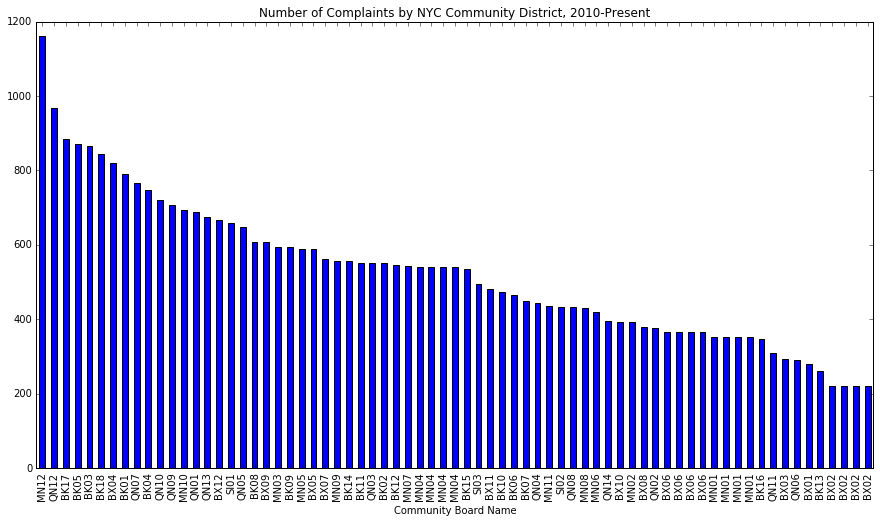

In [288]:
complaints.plot(x='Community Board Name', y='Count of Complaints', kind='bar', figsize=(15, 8), legend=False, title='Number of Complaints by NYC Community District, 2010-Present') 

In [291]:
complaints = complaints.rename(columns={'Community Board Name': 'CBN', 'Count of Complaints': 'Complaints', 'Median Household Income': 'Income', 'Households With Mobile Broadband': 'Mobile', 'Households Without Mobile Broadband': 'NoMobile', 'Households With Low Speed Internet': 'LowInt', 'Households With High Speed Internet': 'HighInt'})

In [ ]:
#covariance matrix

In [292]:
results = smf.ols('Complaints ~ Income + Mobile + HighInt', data=complaints).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:             Complaints   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     3.910
Date:                Sun, 06 Nov 2016   Prob (F-statistic):             0.0126
Time:                        11:33:20   Log-Likelihood:                -442.04
No. Observations:                  67   AIC:                             892.1
Df Residuals:                      63   BIC:                             900.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    486.0406     55.116      8.818      0.0

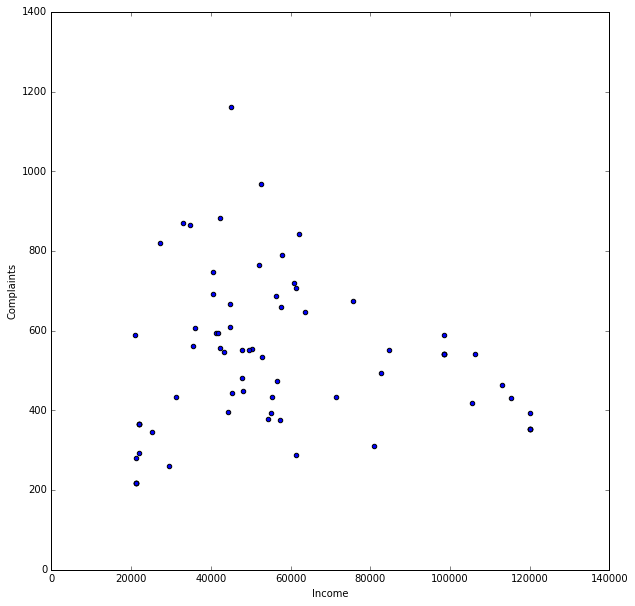

In [294]:
complaints.plot(kind='scatter', x='Income', y='Complaints', marker='o',  figsize=(10, 10))

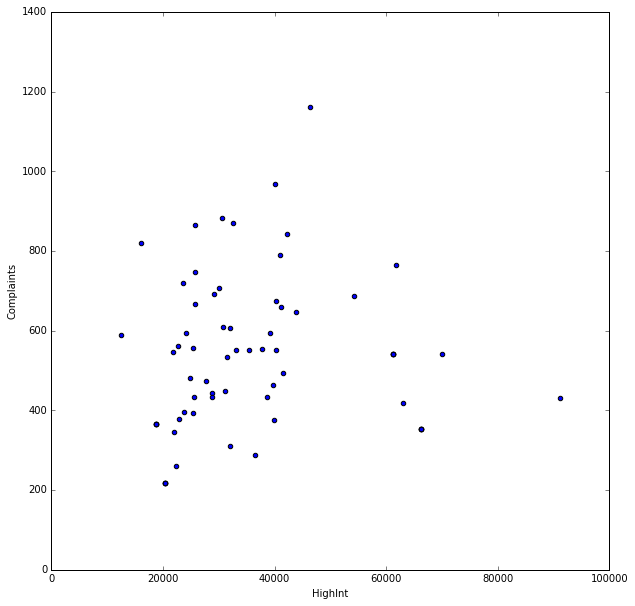

In [295]:
complaints.plot(kind='scatter', x='HighInt', y='Complaints', marker='o',  figsize=(10, 10))

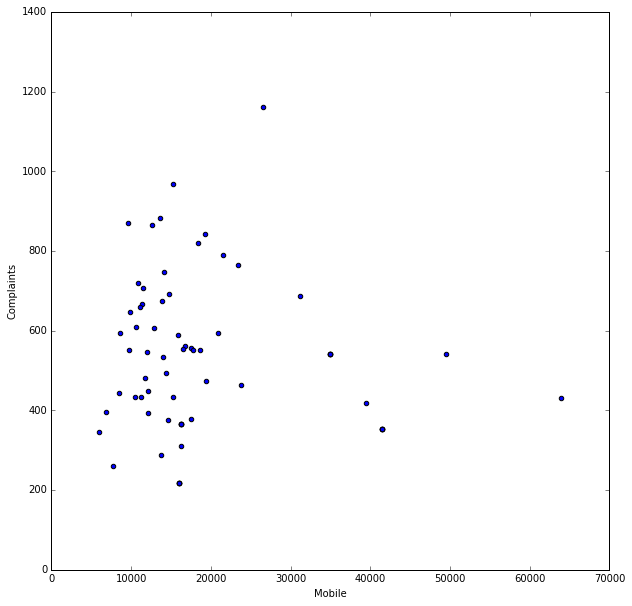

In [296]:
complaints.plot(kind='scatter', x='Mobile', y='Complaints', marker='o',  figsize=(10, 10))